In [1]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader
import matplotlib.pyplot as plt
import pandas as pd

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 64
epochs = 10
mlp_lr = 1e-2
cnn_lr = 1.0
num_workers = 0
pin_memory = False

# Loading the Fashion-MNIST Dataset
# Data Preprocessing 1. Normalize pixel values using transformers

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

full_train = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_set = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

# Data Preprocessing 2.Split data into training, validation, and test sets

train_size = int(0.8 * len(full_train))
val_size = len(full_train) - train_size
train_set, val_set = random_split(full_train, [train_size, val_size], generator=torch.Generator().manual_seed(42))

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=pin_memory)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=pin_memory)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=pin_memory)

print(f"Device: {device}, Train: {len(train_set)}, Val: {len(val_set)}, Test: {len(test_set)}")


Device: cuda, Train: 48000, Val: 12000, Test: 10000


In [2]:
#Model Design Implementing a simple ANN
# Two hidden layers (128 and 64 neurons) in a basic fully connected neural network. ReLU activations to flatten the 28x28 image input and provide logits for ten types of clothes.

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
# Model Design Implementing a CNN
# A two-layer convolutional neural network (CNN) that uses dropout to extract features. Two fully connected layers are then used to categorize pictures into ten different fashion categories.


class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(64*12*12, 128)
        self.fc2 = nn.Linear(128, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model1=MLP()
model2=SimpleCNN()
print(model1)
print(model2)

MLP(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)
SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


MLP Epoch 1/10 - train_acc: 0.7807, val_acc: 0.8355
MLP Epoch 2/10 - train_acc: 0.8495, val_acc: 0.8498
MLP Epoch 3/10 - train_acc: 0.8653, val_acc: 0.8594
MLP Epoch 4/10 - train_acc: 0.8734, val_acc: 0.8705
MLP Epoch 5/10 - train_acc: 0.8822, val_acc: 0.8797
MLP Epoch 6/10 - train_acc: 0.8875, val_acc: 0.8759
MLP Epoch 7/10 - train_acc: 0.8918, val_acc: 0.8696
MLP Epoch 8/10 - train_acc: 0.8944, val_acc: 0.8821
MLP Epoch 9/10 - train_acc: 0.9004, val_acc: 0.8812
MLP Epoch 10/10 - train_acc: 0.9029, val_acc: 0.8835
MLP Test Loss: 0.3400, Test Acc: 0.8769


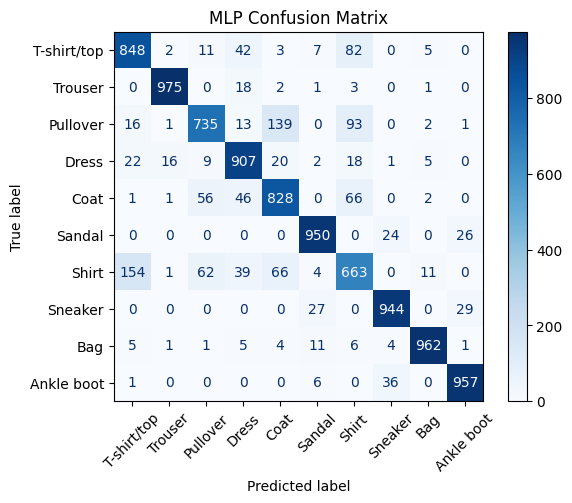

CNN Epoch 1/10 - train_acc: 0.8158, val_acc: 0.8820
CNN Epoch 2/10 - train_acc: 0.8868, val_acc: 0.8975
CNN Epoch 3/10 - train_acc: 0.9036, val_acc: 0.9117
CNN Epoch 4/10 - train_acc: 0.9140, val_acc: 0.9161
CNN Epoch 5/10 - train_acc: 0.9188, val_acc: 0.9163
CNN Epoch 6/10 - train_acc: 0.9269, val_acc: 0.9116
CNN Epoch 7/10 - train_acc: 0.9290, val_acc: 0.9236
CNN Epoch 8/10 - train_acc: 0.9327, val_acc: 0.9192
CNN Epoch 9/10 - train_acc: 0.9386, val_acc: 0.9251
CNN Epoch 10/10 - train_acc: 0.9397, val_acc: 0.9237
CNN Test Loss: 0.2577, Test Acc: 0.9197


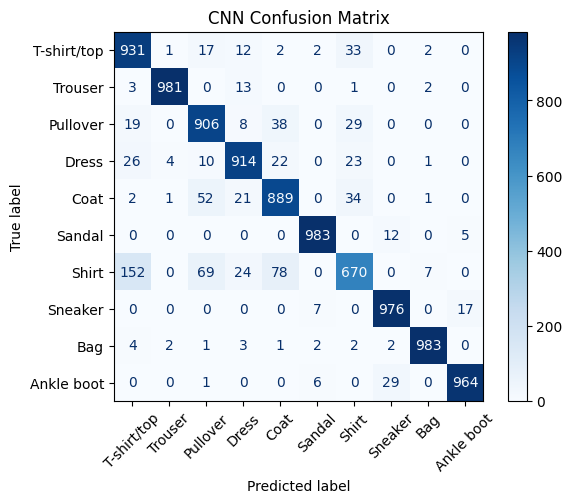

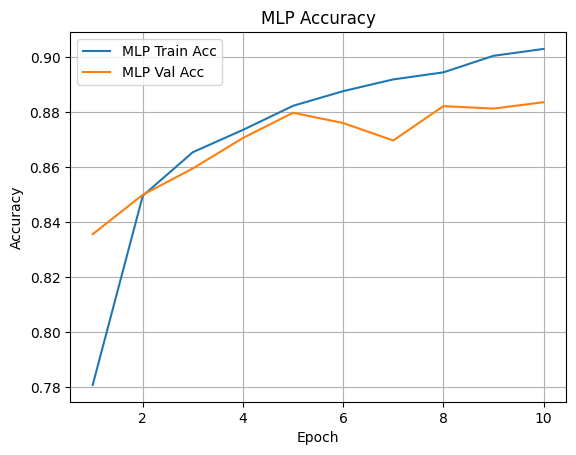

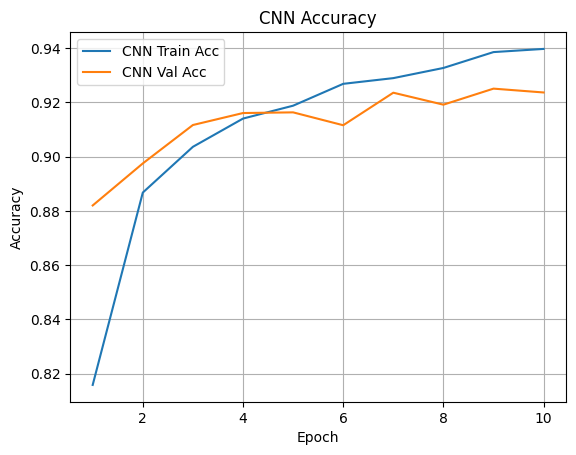

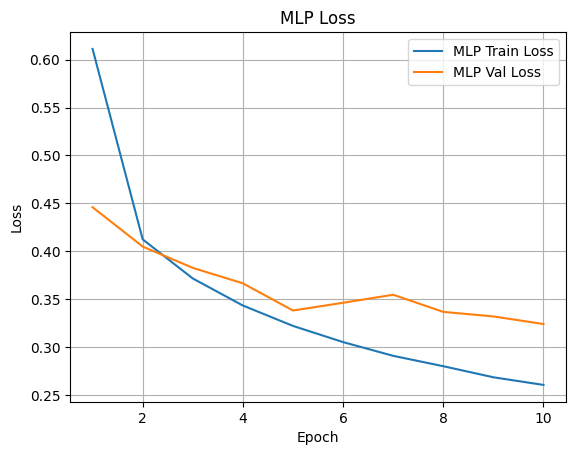

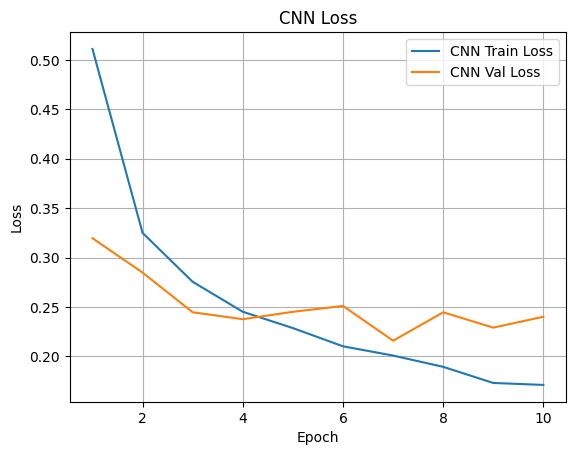

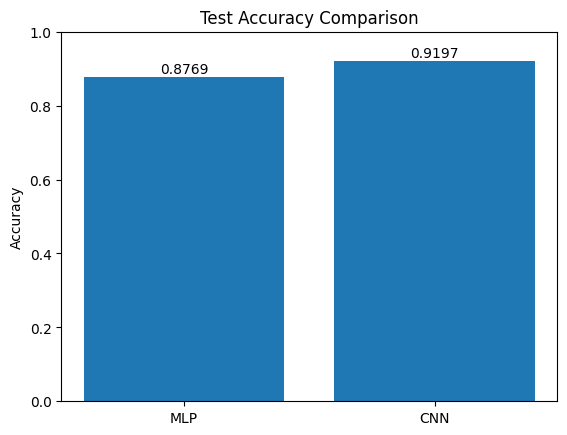

  Model  Test Loss  Test Acc
0   MLP   0.340041    0.8769
1   CNN   0.257750    0.9197
Models and summary saved to saved_models/


In [6]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

#Training and Testing

import matplotlib.pyplot as plt
# Train and evaluate the model using loss and accuracy metrics. Models are trained on the training set and evaluated on the test set with confusion matrix

def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for X, y in loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * X.size(0)
        preds = outputs.argmax(dim=1)
        correct += (preds == y).sum().item()
        total += X.size(0)
    return running_loss / total, correct / total

def evaluate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for X, y in loader:
            X, y = X.to(device), y.to(device)
            outputs = model(X)
            loss = criterion(outputs, y)
            running_loss += loss.item() * X.size(0)
            preds = outputs.argmax(dim=1)
            correct += (preds == y).sum().item()
            total += X.size(0)
    return running_loss / total, correct / total

mlp = MLP().to(device)
optimizer_mlp = optim.SGD(mlp.parameters(), lr=mlp_lr, momentum=0.9)
criterion_mlp = nn.CrossEntropyLoss()

history_mlp = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
for epoch in range(1, epochs+1):
    tr_loss, tr_acc = train_one_epoch(mlp, train_loader, optimizer_mlp, criterion_mlp, device)
    val_loss, val_acc = evaluate(mlp, val_loader, criterion_mlp, device)
    history_mlp['train_loss'].append(tr_loss)
    history_mlp['train_acc'].append(tr_acc)
    history_mlp['val_loss'].append(val_loss)
    history_mlp['val_acc'].append(val_acc)
    print(f"MLP Epoch {epoch}/{epochs} - train_acc: {tr_acc:.4f}, val_acc: {val_acc:.4f}")

test_loss_mlp, test_acc_mlp = evaluate(mlp, test_loader, criterion_mlp, device)
print(f"MLP Test Loss: {test_loss_mlp:.4f}, Test Acc: {test_acc_mlp:.4f}")


def show_confusion_and_report(model, loader, device, model_name):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for X, y in loader:
            X, y = X.to(device), y.to(device)
            outputs = model(X)
            preds = outputs.argmax(dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y.cpu().numpy())

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)


    # Plot
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=['T-shirt/top','Trouser','Pullover','Dress','Coat',
                                                  'Sandal','Shirt','Sneaker','Bag','Ankle boot'])
    disp.plot(cmap='Blues', xticks_rotation=45)
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()


show_confusion_and_report(mlp, test_loader, device, "MLP")

cnn = SimpleCNN().to(device)
optimizer_cnn = optim.Adadelta(cnn.parameters(), lr=cnn_lr)
criterion_cnn = nn.NLLLoss()

history_cnn = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
for epoch in range(1, epochs+1):
    tr_loss, tr_acc = train_one_epoch(cnn, train_loader, optimizer_cnn, criterion_cnn, device)
    val_loss, val_acc = evaluate(cnn, val_loader, criterion_cnn, device)
    history_cnn['train_loss'].append(tr_loss)
    history_cnn['train_acc'].append(tr_acc)
    history_cnn['val_loss'].append(val_loss)
    history_cnn['val_acc'].append(val_acc)
    print(f"CNN Epoch {epoch}/{epochs} - train_acc: {tr_acc:.4f}, val_acc: {val_acc:.4f}")

test_loss_cnn, test_acc_cnn = evaluate(cnn, test_loader, criterion_cnn, device)
print(f"CNN Test Loss: {test_loss_cnn:.4f}, Test Acc: {test_acc_cnn:.4f}")

# Compare ANN and CNN performance to analyze accuracy and class-wise confusion.

show_confusion_and_report(cnn, test_loader, device, "CNN")

epochs_range = range(1, epochs+1)

plt.figure()
plt.plot(epochs_range, history_mlp['train_acc'], label='MLP Train Acc')
plt.plot(epochs_range, history_mlp['val_acc'], label='MLP Val Acc')
plt.title('MLP Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(epochs_range, history_cnn['train_acc'], label='CNN Train Acc')
plt.plot(epochs_range, history_cnn['val_acc'], label='CNN Val Acc')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#The confusion matrix displays misclassifications between visually comparable objects, such as coats and pullovers or shirts and T-shirts/tops.

plt.figure()
plt.plot(epochs_range, history_mlp['train_loss'], label='MLP Train Loss')
plt.plot(epochs_range, history_mlp['val_loss'], label='MLP Val Loss')
plt.title('MLP Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(epochs_range, history_cnn['train_loss'], label='CNN Train Loss')
plt.plot(epochs_range, history_cnn['val_loss'], label='CNN Val Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# comparison bar
plt.figure()
models = ['MLP', 'CNN']
test_accs = [test_acc_mlp, test_acc_cnn]
plt.bar(models, test_accs)
plt.title('Test Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
for i, v in enumerate(test_accs):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
plt.show()

os.makedirs('saved_models', exist_ok=True)
torch.save(mlp.state_dict(), 'saved_models/mlp_fashionmnist.pth')
torch.save(cnn.state_dict(), 'saved_models/cnn_fashionmnist.pth')
summary = pd.DataFrame({
    'Model': ['MLP', 'CNN'],
    'Test Loss': [test_loss_mlp, test_loss_cnn],
    'Test Acc': [test_acc_mlp, test_acc_cnn]
})
print(summary)
summary.to_csv('saved_models/test_summary.csv', index=False)
print('Models and summary saved to saved_models/')
# CNNs can help eliminate these confusions caused by similar shapes and textures.


In [8]:
# Suggest improvements
mlp = MLP().to(device)
optimizer_mlp = optim.SGD(mlp.parameters(), lr=mlp_lr, momentum=0.9)
criterion_mlp = nn.CrossEntropyLoss()
scheduler_mlp = optim.lr_scheduler.StepLR(optimizer_mlp, step_size=2, gamma=0.5)
#we used the learning rate scheduler but it didn’t effort more and we got the highest accuracy in CNN.
history_mlp = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': [], 'lr': []}
for epoch in range(1, epochs+1):
    tr_loss, tr_acc = train_one_epoch(mlp, train_loader, optimizer_mlp, criterion_mlp, device)
    val_loss, val_acc = evaluate(mlp, val_loader, criterion_mlp, device)
    scheduler_mlp.step()
    current_lr = optimizer_mlp.param_groups[0]['lr']
    history_mlp['train_loss'].append(tr_loss)
    history_mlp['train_acc'].append(tr_acc)
    history_mlp['val_loss'].append(val_loss)
    history_mlp['val_acc'].append(val_acc)
    history_mlp['lr'].append(current_lr)
    print(f"MLP Epoch {epoch}/{epochs} | lr: {current_lr:.5f} | train_acc: {tr_acc:.4f} | val_acc: {val_acc:.4f}")

test_loss_mlp, test_acc_mlp = evaluate(mlp, test_loader, criterion_mlp, device)
print(f"MLP Test Loss: {test_loss_mlp:.4f}, Test Acc: {test_acc_mlp:.4f}")




MLP Epoch 1/10 | lr: 0.01000 | train_acc: 0.7772 | val_acc: 0.8342
MLP Epoch 2/10 | lr: 0.00500 | train_acc: 0.8483 | val_acc: 0.8578
MLP Epoch 3/10 | lr: 0.00500 | train_acc: 0.8711 | val_acc: 0.8679
MLP Epoch 4/10 | lr: 0.00250 | train_acc: 0.8775 | val_acc: 0.8650
MLP Epoch 5/10 | lr: 0.00250 | train_acc: 0.8859 | val_acc: 0.8783
MLP Epoch 6/10 | lr: 0.00125 | train_acc: 0.8910 | val_acc: 0.8768
MLP Epoch 7/10 | lr: 0.00125 | train_acc: 0.8961 | val_acc: 0.8815
MLP Epoch 8/10 | lr: 0.00063 | train_acc: 0.8971 | val_acc: 0.8822
MLP Epoch 9/10 | lr: 0.00063 | train_acc: 0.9010 | val_acc: 0.8835
MLP Epoch 10/10 | lr: 0.00031 | train_acc: 0.9010 | val_acc: 0.8843
MLP Test Loss: 0.3443, Test Acc: 0.8788


In [7]:
cnn = SimpleCNN().to(device)
optimizer_cnn = optim.Adadelta(cnn.parameters(), lr=cnn_lr)
criterion_cnn = nn.NLLLoss()

scheduler_cnn = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer_cnn, mode='min', factor=0.5, patience=1
)

history_cnn = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': [], 'lr': []}

for epoch in range(1, epochs + 1):
    tr_loss, tr_acc = train_one_epoch(cnn, train_loader, optimizer_cnn, criterion_cnn, device)
    val_loss, val_acc = evaluate(cnn, val_loader, criterion_cnn, device)
    old_lr = optimizer_cnn.param_groups[0]['lr']
    scheduler_cnn.step(val_loss)
    new_lr = optimizer_cnn.param_groups[0]['lr']
    if new_lr != old_lr:
        print(f"LR reduced from {old_lr:.5f} → {new_lr:.5f}")
    history_cnn['train_loss'].append(tr_loss)
    history_cnn['train_acc'].append(tr_acc)
    history_cnn['val_loss'].append(val_loss)
    history_cnn['val_acc'].append(val_acc)
    history_cnn['lr'].append(new_lr)
    print(f"CNN Epoch {epoch}/{epochs} | lr: {new_lr:.5f} | train_acc: {tr_acc:.4f} | val_acc: {val_acc:.4f}")

test_loss_cnn, test_acc_cnn = evaluate(cnn, test_loader, criterion_cnn, device)
print(f"CNN Test Loss: {test_loss_cnn:.4f}, Test Acc: {test_acc_cnn:.4f}")



CNN Epoch 1/10 | lr: 1.00000 | train_acc: 0.8228 | val_acc: 0.8738
CNN Epoch 2/10 | lr: 1.00000 | train_acc: 0.8840 | val_acc: 0.9077
CNN Epoch 3/10 | lr: 1.00000 | train_acc: 0.9018 | val_acc: 0.9093
CNN Epoch 4/10 | lr: 1.00000 | train_acc: 0.9124 | val_acc: 0.9199
CNN Epoch 5/10 | lr: 1.00000 | train_acc: 0.9189 | val_acc: 0.9213
CNN Epoch 6/10 | lr: 1.00000 | train_acc: 0.9226 | val_acc: 0.9227
LR reduced from 1.00000 → 0.50000
CNN Epoch 7/10 | lr: 0.50000 | train_acc: 0.9275 | val_acc: 0.9200
CNN Epoch 8/10 | lr: 0.50000 | train_acc: 0.9428 | val_acc: 0.9291
CNN Epoch 9/10 | lr: 0.50000 | train_acc: 0.9459 | val_acc: 0.9266
LR reduced from 0.50000 → 0.25000
CNN Epoch 10/10 | lr: 0.25000 | train_acc: 0.9503 | val_acc: 0.9266
CNN Test Loss: 0.2269, Test Acc: 0.9268


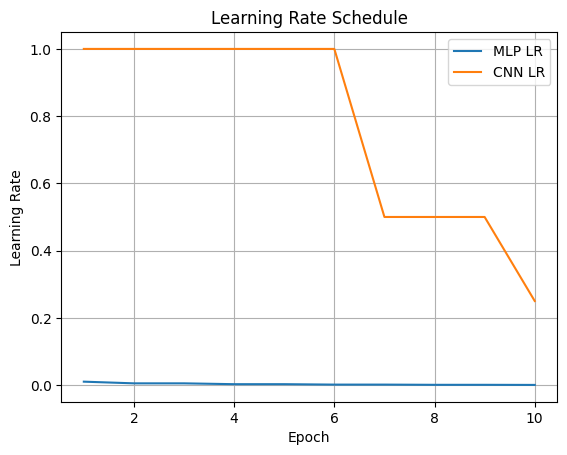

In [9]:
plt.figure()
plt.plot(range(1, epochs+1), history_mlp['lr'], label='MLP LR')
plt.plot(range(1, epochs+1), history_cnn['lr'], label='CNN LR')
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()
plt.grid(True)
plt.show()
